<a href="https://colab.research.google.com/github/DolgorTs/resumeandprojects.github/blob/main/EDA_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Проведен EDA анализ датасета Salary.
Выявлены пропущенные значения, аномалии и выбросы, а также зависимости между переменными.



In [ ]:
df = pd.read_csv("salary_dataset.csv")


In [ ]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


- Age: The age of the individuals in the dataset, representing their chronological age in years.

- Gender: The gender identification of the individuals, indicating their gender or gender identity.

- Education Level: The highest level of education attained by the individuals, indicating their educational qualifications or degree.

- Job Title: The occupation or job title of the individuals, specifying their professional role or position.

- Years of Experience: The number of years of professional experience accumulated by the individuals in their respective fields.

- Salary: The income level or salary earned by the individuals, denoting their monetary compensation.

- Country: The country of residence or origin of the individuals, providing geographical information.

- Race: The racial background or ethnicity of the individuals, reflecting their specific racial or ethnic group.

In [ ]:
# Посмотрим на размеры датафрейма
df.shape

(6704, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


Данные пропущены в 5 столбцах: Age, Gender, Education Level, Years of Experience, Salary. При этом доля пропусков незначительна от 2 до 5, в связи с этим заполнять пропуски не будем.


Также тип данных столбца Age - float64, что не совсем корректно, т.к. возраст это целое число, и данные в этом столбце должны быть в формате integer.

In [ ]:
df['Age'].unique()

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 48., 35., 40.,
       27., 44., 33., 39., 25., 51., 34., 47., 30., 41., 37., 24., 43.,
       50., 46., 49., 23., 53., nan, 61., 57., 62., 55., 56., 54., 60.,
       58., 22., 21.])

In [ ]:
# исправим тип данных

df['Age'] = df['Age'].astype('Int64')

Также в столбце Education Level видно, что данные внесены некорректно, где-то указано Bachelor's, хотя это Bachelor's Degree, Master's - Master's Degree и phD - PhD.

In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [ ]:
# Заменим Bachelor's, Master's и phD на корректные значения

df['Education Level'] = df['Education Level']. replace (["Bachelor's", "Master's","phD"], ["Bachelor's Degree", "Master's Degree",'PhD'])

In [ ]:
# статистики для столбцов с количественными признаками:

df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.0,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.0,0.000000,350.000000
25%,1675.750000,28.0,3.000000,70000.000000
50%,3351.500000,32.0,7.000000,115000.000000
75%,5027.250000,38.0,12.000000,160000.000000
max,6703.000000,62.0,34.000000,250000.000000


In [ ]:
# Базовые статистики для Age

print('mean - среднее ариф.')
print(df['Age'].mean())
print('-----------')
print('median:')
print(df['Age'].median())
print('-----------')
print('mode:')
print(df['Age'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['Age'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['Age'].var())

mean - среднее ариф.
33.62085944494181
-----------
median:
32.0
-----------
mode:
27
-----------
std - стандарт. отклонение
7.614632626251303
-----------
var - дисперсия:
57.98263003277081


In [ ]:
fig = px.histogram(
    data_frame=df,
    x='Age',
    title='Распределение возраста',
    marginal='box',
    histnorm='percent'
)
fig.show()

Судя по визуализации и базовым статистикам можно сказать, что в компании работают люди в основном в возрасте от 25 до 36 лет. После 36 лет количество сотрудников в более старшем возрасте уменьшается. Также видны выбросы в возрасте свыше 53 лет, т.е это люди предпенсионного и пенсионного возраста. Минимальный возраст сотрудников в компании - 21 год, понятно, что в возрасте 21-23 года люди чаще все еще получают образование, и возможно работают на каких-то начальных позициях (стажер и тд).

В целом нет каких-то аномальных значений возраста, который не пресущ людям, данные вполне жизненные.




Можно проследить зависимость, и скорей всего прямую, уровня образования от возраста, то есть чем выше возраст тем выше уровень образования. Визуализируем это в следующем виде:

In [ ]:
fig = px.box(
    data_frame=df,
    x='Education Level',
    y='Age',
    color='Education Level',
    title='Распределение возраста и уровня образования',
)
fig.show()

Возраст людей, окончивщих только страшую школу примерно одинаковый с людьми, получивших степень магистра. Присутствуют 4 выброса, где возраст свыше 43 лет. Скорей всего доля таких спецалистов невысокая - возможно это какие-то низкоквалифицированные сотрудники, либо - без диплома.

Понятно, что в возрасте от 27 до 32 лет, люди обычно уже получили какое-то образование выше старшей школы. Видны выбросы - от 40 до 55 лет. Объяснимо тем, что какие-то люди ограничиваются и не обучаются далее.

Большая часть сотрудников, получивших степень магистра от 30 до 39 лет.
Т.е примерно в 27-32 года заканчиваю бакалавриат, и далее получают магистерскую степень.  

Наиболее высокий разброс данных у возраста сотрудников, получивших кандидатскую степень. Минимальный возраст - 23, максимум - 62. Нижний и верхний квартили - 34 и 47 соответсвенно. Медианный возраст - 42. При этом нет выбросов.

Можно сделать вывод, что чем старше люди, тем выше у них образование. Но это не ограничивается какими-то четким рамками. Могут быть кандидаты наук в 23 года, и при это окончить только страшую школу в 54.



In [ ]:
# Базовые статистики для Years of Experience

print('mean - среднее ариф.')
print(df['Years of Experience'].mean())
print('-----------')
print('median:')
print(df['Years of Experience'].median())
print('-----------')
print('mode:')
print(df['Years of Experience'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['Years of Experience'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['Years of Experience'].var())

mean - среднее ариф.
8.094687360095508
-----------
median:
7.0
-----------
mode:
2.0
-----------
std - стандарт. отклонение
6.059003056634102
-----------
var - дисперсия:
36.7115180403014


Статистики по опыту работы схожи с возрастом. Виден разброс данных (min - 0, max - 34), также отличаются меры средней тенденции. Чаще встречается опыт работы - 2 года, т.е. работает много молодых специалистов, при этом медиана и среднее - около 7 и 8.

In [ ]:
fig = px.histogram(
    data_frame=df,
    x='Years of Experience',
    title='Распределение стажа работы',
    marginal='box',
    histnorm='percent'
)
fig.show()

Сотрудники со стажем работы 1 и 4 года преобладают.
Чем выше стаж, тем меньше сотрудников.
Есть выбросы, где стаж выше 26 лет. Понятно, что люди с большим стажем уходят на пенсию и тд, поэтому таких людей работает меньше.

Зависит ли уровень зарплаты от стажа работы:

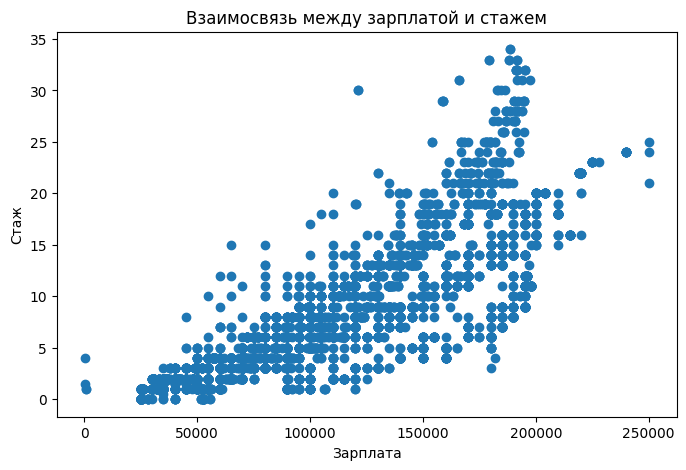

In [ ]:
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x="Salary", y="Years of Experience")
plt.title("Взаимосвязь между зарплатой и стажем")
plt.ylabel("Стаж")
plt.xlabel("Зарплата")
plt.show()

Почти линейная взаимосвязь. Зарплата повышается до стажа 35, но далее стаж не самый высокий, при этом зарплата имеет самые высокие значения.

In [ ]:
fig = px.box(
    data_frame=df,
    x='Years of Experience',
    y='Salary',
    color='Years of Experience',
    title='Распределение стажа работы и зарплаты',
)
fig.show()

Видно, что выбросы в наибольшую сторону в зарплате у сотрудников с опытом работы 21 и 25 лет. Скорей всего это какие-то очень востребованные специалисты, либо топ-менеджеры.
Также у сотрудников с небольшим опытом 0-4  года - разбросы по зарплате очень большие.

В целом зависимость опыта работы от зарплаты есть, но также на уровень зарплаты можеть влиять третий фактор - занимаемая должность.


In [ ]:
# Базовые статистики для Salary

print('mean - среднее ариф.')
print(df['Salary'].mean())
print('-----------')
print('median:')
print(df['Salary'].median())
print('-----------')
print('mode:')
print(df['Salary'].mode()[0])
print('-----------')
print('std - стандарт. отклонение')
print(df['Salary'].std())
print('-----------')
print('var - дисперсия:')  #Чем выше дисперсия, тем выше разброс значений в ряде данных.
print(df['Salary'].var())

mean - среднее ариф.
115326.96477086132
-----------
median:
115000.0
-----------
mode:
140000.0
-----------
std - стандарт. отклонение
52786.18391068297
-----------
var - дисперсия:
2786381211.852446


Бросается в глаза большая величина дисперсии и Станд. отклонения, т.е. разброс данных очень велик. Как мы видили, минимальная зарплата - 350, а максимальная - 250 000. Размах огромен - 249 650.
Далее мы проаналируем salary на предмет выбросов, но пока можно сказать, что данные вполне как в жизни, т.к., к примеру, зарплаты низкоквалифицированного и высококвалифицированного сотрудников - обычно сильно отличаются.

In [ ]:
fig = px.histogram(
    data_frame=df,
    x='Salary',
    title='Распределение зарплаты',
    marginal='box',
    histnorm='percent'
)
fig.show()

На блоксплоте выбросов нет. Но вилка по зарплата велика: от 350 единиц до 250 тысяч единиц, но большая часть получает от 25 до 205 тысяч.

Часто встречаемые значения: 120, 140, 160 тысяч.

На мой взгляд, это вполне допустимые значения, для зарплат в IT сфере.


Проверим распределение зарплаты и пола:

In [ ]:
fig = px.box(
    data_frame=df,
    x='Gender',
    y='Salary',
    color='Gender',
    title='Распределение зарплаты и пола',
)
fig.show()

Видно, что мужчины получают больше женщин и другого пола. При это нет очень низких и очень высоких значений.

Можно еще посмотреть на распределение страны и уровня зарплаты:

In [ ]:
fig = px.box(
    data_frame=df,
    x='Country',
    y='Salary',
    color='Country',
    title='Распределение зарплаты по странам',
)
fig.show()

В целом уровень зарплаты по странам несильно отличается.

Для категориальных перменных  можно найти моды, проанализировать распределение по категориям, проверить уникальные значения категорий на предмет ошибок и соответствия описанию данных.

In [ ]:
# Пол

print('mode:')
print(df['Gender'].mode()[0])
print('--------')
print('распределение:')
print(df['Gender'].value_counts())
print('--------')
print('уникальные значения:')
print(df['Gender'].unique())

mode:
Male
--------
распределение:
Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64
--------
уникальные значения:
['Male' 'Female' nan 'Other']


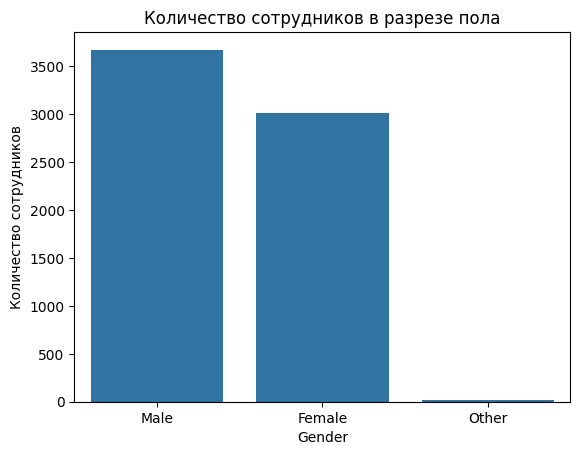

In [ ]:
sns.countplot(data=df, x="Gender")
plt.title("Количество сотрудников в разрезе пола")
plt.ylabel("Количество сотрудников")
plt.show()

Видно, что мужчин в организации работает больше, но несильно больше женщин, распределение 55% на 45%. Людей идентифицирующих себя как другой пол меньше 1%.

In [ ]:
fig = px.box(
    data_frame=df,
    x='Gender',
    y='Education Level',
    color='Gender',
    title='Распределение уровня образования и пола',
)
fig.show()

Видно, что уровень образования у женщин и мужчин не отличается. У людей идентифицирующих себя как другой пол - образование либо только старшая школа, либо степень магистра.

In [ ]:
# Education Level

print('mode:')
print(df['Education Level'].mode()[0])
print('--------')
print('распределение:')
print(df['Education Level'].value_counts())
print('--------')
print('уникальные значения:')
print(df['Education Level'].unique())

mode:
Bachelor's Degree
--------
распределение:
Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64
--------
уникальные значения:
["Bachelor's Degree" "Master's Degree" 'PhD' nan 'High School']


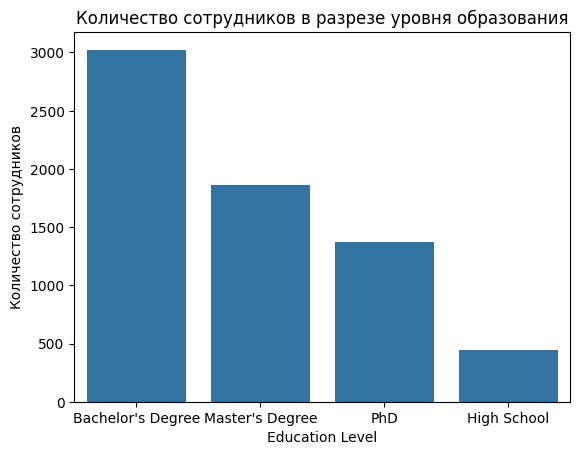

In [ ]:
sns.countplot(data=df, x="Education Level")
plt.title("Количество сотрудников в разрезе уровня образования")
plt.ylabel("Количество сотрудников")
plt.show()

Почти 50% сотрудников имеют эту степень бакалавра
28%  - степень магистра
20% - кандидаты наук
И наименьшая доля 6% - сотрудники, окончившие только старшую школу.


In [ ]:
# Job Title

print('mode:')
print(df['Job Title'].mode()[0])
print('--------')
print('распределение:')
print(df['Job Title'].value_counts())
print('--------')
print('уникальные значения:')
print(df['Job Title'].unique())

mode:
Software Engineer
--------
распределение:
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: Job Title, Length: 193, dtype: int64
--------
уникальные значения:
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' '

Уникальных значений должностей достаточно много.
Но видно топ-5 - это должности, связанные с разработкой и аналитикой данных, т.е преимущественно IT - специальности.

In [ ]:
# Country

print('mode:')
print(df['Country'].mode()[0])
print('--------')
print('распределение:')
print(df['Country'].value_counts())
print('--------')
print('уникальные значения:')
print(df['Country'].unique())

mode:
USA
--------
распределение:
USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: Country, dtype: int64
--------
уникальные значения:
['UK' 'USA' 'Canada' 'China' 'Australia']


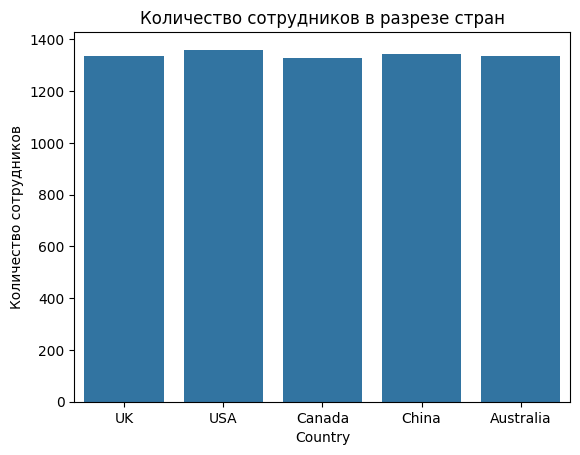

In [ ]:
sns.countplot(data=df, x="Country")
plt.title("Количество сотрудников в разрезе стран")
plt.ylabel("Количество сотрудников")
plt.show()

Сотрудники только из 5 стран. При чем распределение примерно в равных долях.

In [ ]:
# Race

print('mode:')
print(df['Race'].mode()[0])
print('--------')
print('распределение:')
print(df['Race'].value_counts())
print('--------')
print('уникальные значения:')
print(df['Race'].unique())

mode:
White
--------
распределение:
White               1968
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: Race, dtype: int64
--------
уникальные значения:
['White' 'Hispanic' 'Asian' 'Korean' 'Chinese' 'Australian' 'Welsh'
 'African American' 'Mixed' 'Black']


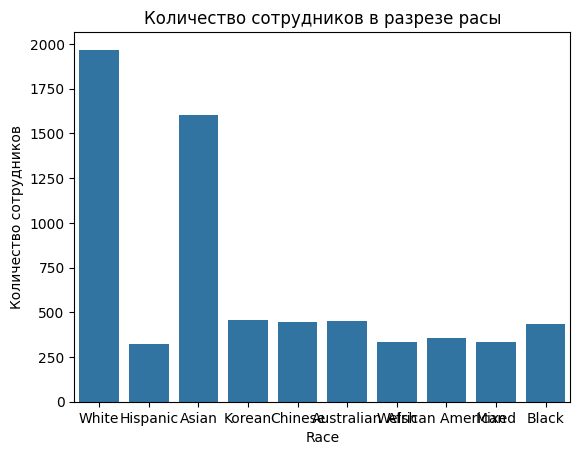

In [ ]:
sns.countplot(data=df, x="Race")
plt.title("Количество сотрудников в разрезе расы")
plt.ylabel("Количество сотрудников")
plt.show()

В компании наибольшая доля белых, далее - азиаты, и по нисходящей примерно в равных долях остальные.

Рассмотрим взаимосвязь между должностью, зарплатой и стажем работы :

In [ ]:
corr_matrix_pearson = df[["Salary", "Years of Experience", "Age"]].corr()
corr_matrix_pearson

,Salary,Years of Experience,Age
Salary,1.000000,0.808969,0.728053
Years of Experience,0.808969,1.000000,0.937655
Age,0.728053,0.937655,1.000000


Корреляция между возрастом, стажем и зарлатой везде положительная. Наиболее сильная взаимосвязь между стажем и возрастом Средняя - между стажем и зарплатой, возрастом и зарплатой

Изучим взаимосвязь зарплаты от пола и уровня образования:

In [ ]:
edu_ = pd.pivot_table(data=df, index='Education Level', columns='Gender', values='Salary', aggfunc='mean')
edu_

Gender,Female,Male,Other
Education Level,,,
Bachelor's Degree,89165.219533,98971.768513,NaN
High School,30756.047809,39380.751351,119949.333333
Master's Degree,122694.542135,140060.592405,161393.000000
PhD,160266.292339,168711.071019,NaN


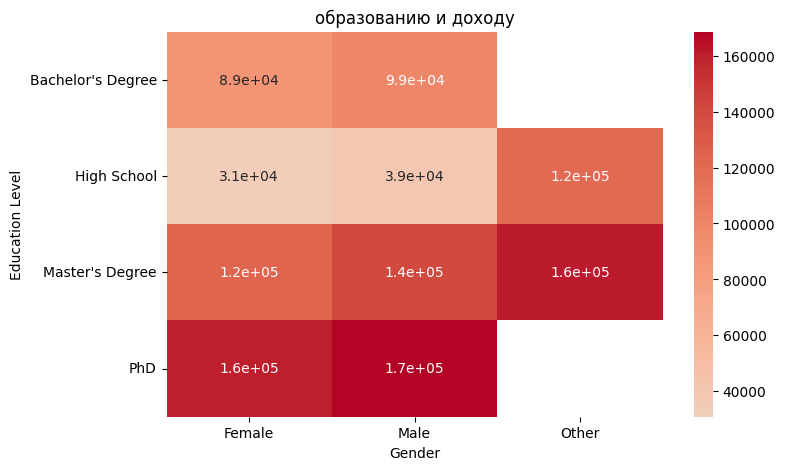

In [ ]:
plt.figure(figsize=[8, 5])
sns.heatmap(edu_, annot=True, cmap='coolwarm',center=0.117)
plt.title("образованию и доходу")
plt.show()

На тепловой карте ясно видно, что с повышением образования зарплата растет, при этом у мужчин зарплаты выше.

In [ ]:
# уровень средней зарплаты и должности по убыванию
salarys = df.groupby('Job Title')[['Salary']].mean().sort_values('Salary', ascending=False)

salarys

,Salary
Job Title,
CEO,250000.000000
Chief Technology Officer,250000.000000
Chief Data Officer,220000.000000
Director of Data Science,204561.403509
VP of Finance,200000.000000
...,...
Junior Sales Associate,28211.267606
Delivery Driver,28000.000000
Receptionist,25000.000000


<Axes: title={'center': 'Топ 5 зарплат'}, xlabel='Должность', ylabel='Зарплата'>

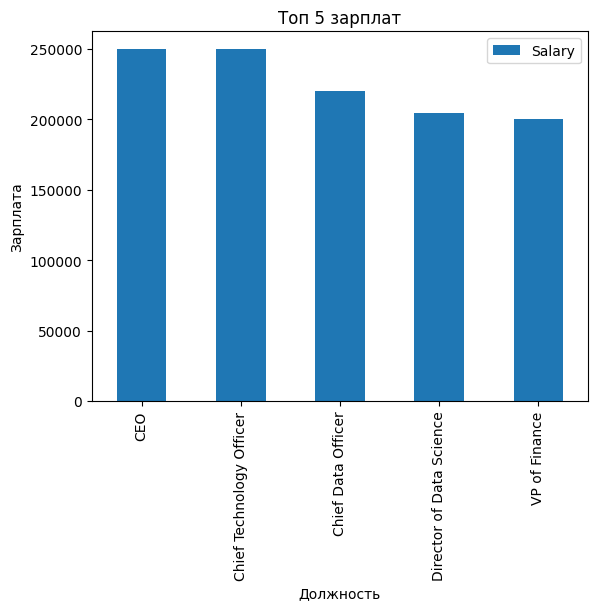

In [ ]:
salarys.loc[['CEO', 'Chief Technology Officer', 'Chief Data Officer', 'Director of Data Science', 'VP of Finance']].sort_values(by='Salary', ascending=False).plot(kind='bar',
                                                                  title='Топ 5 зарплат',
                                                                  xlabel='Должность',
                                                                  ylabel='Зарплата')

Как видно наибольшие зарплаты получают топ-менеджеры.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   Int64  
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(5)
memory usage: 478.0+ KB


Взаимосвязь зарплаты, уровня образования и пола и Job Title